In [1]:
from antithetic import Antithetic
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload

In [15]:
param = {'omega': 100, 'rho': 10, 'theta1': 125, 'theta2': 1, 
         'k': 1, 'degrade_p': 1, 'mu': 100, 'eta': 100}

In [16]:
sim = Antithetic(**param)

In [17]:
sol = sim.get_response([100, 100, 10, 1], 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.29‰/s]


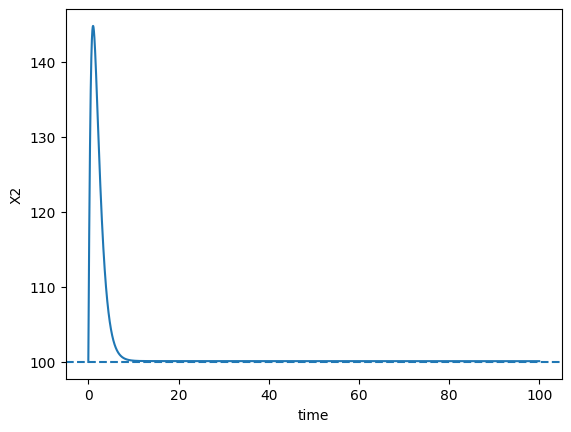

In [18]:
plt.plot(sol.t, sol.y[1])
plt.axhline(y=100, linestyle="--")
plt.xlabel("time")
plt.ylabel("X2")
plt.show()

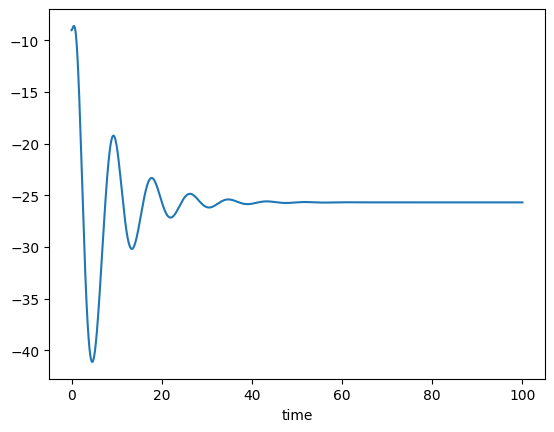

In [9]:
plt.plot(sol.t, sol.y[3]-sol.y[2])
plt.xlabel("time")
plt.show()

stability: 1) default setting is not stable

2) equalibrium exist and stability

In [27]:
theta1 = np.linspace(115, 115.5, 5)
print(theta1)

[110.  112.5 115.  117.5 120. ]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.66‰/s]


[107.05819438729543, 96.9976432820085, 98.48426213491412, 109.9860745215083, 114.67088108650644]


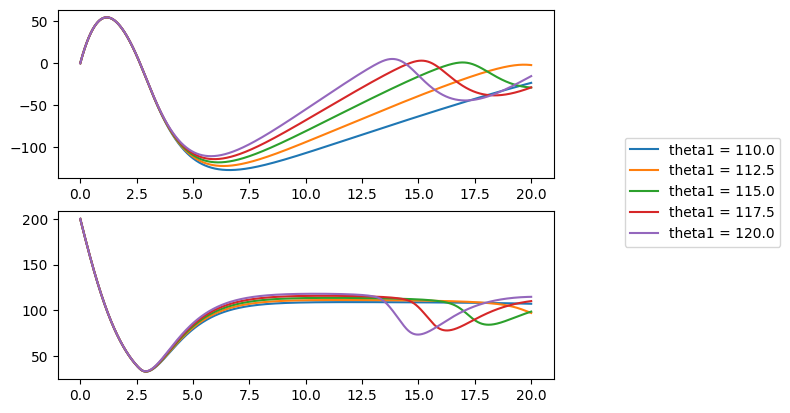

In [28]:
y_ss = []
fig, axes = plt.subplots(2, 1) 
for series, theta in sim.responses_at_theta1([100, 100, 10, 1], 40, theta1):
    axes[0].plot(series.t, series.y[3] - series.y[2])
    axes[1].plot(series.t, series.y[1], label="theta1 = {}".format(theta))
    y_ss.append(series.y[1][-1])
print(y_ss)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [141]:
theta1 = np.linspace(101, 115, 15)
print(theta1)


[101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114.
 115.]


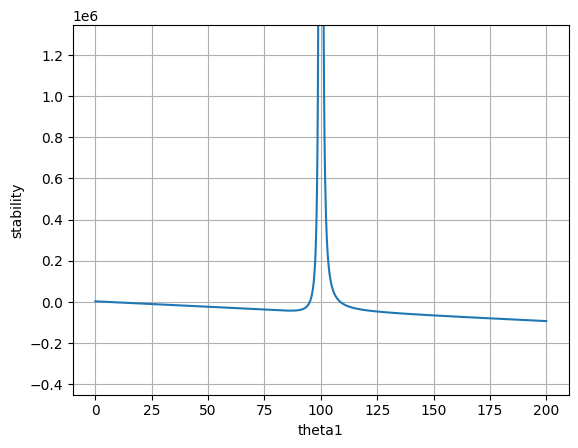

The solution is theta = 108.706742
at which the value of the expression is -0.000000


In [206]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the expression whose roots we want to find

rho = 5

func = lambda t : 200 * (rho + 100 / (t - 100)) ** 2 - t * rho * 100

# Plot it

t = np.linspace(-0, 200, 1000)

plt.plot(t, func(t))
plt.ylim(np.mean(func(t)) - 0.1 * np.std(func(t)), np.mean(func(t)) + 0.1 * np.std(func(t)))
plt.xlabel("theta1")
plt.ylabel("stability")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

theta_initial_guess = 101
theta_solution = fsolve(func, theta_initial_guess)

print("The solution is theta = %f" % theta_solution)
print("at which the value of the expression is %f" % func(theta_solution))

In [2]:
param = {'omega': 0, 'rho': 10, 'theta1': 115, 'theta2': 1, 
         'k': 1, 'degrade_p': 1, 'mu': 100, 'eta': 100}
sim2 = Antithetic(**param)

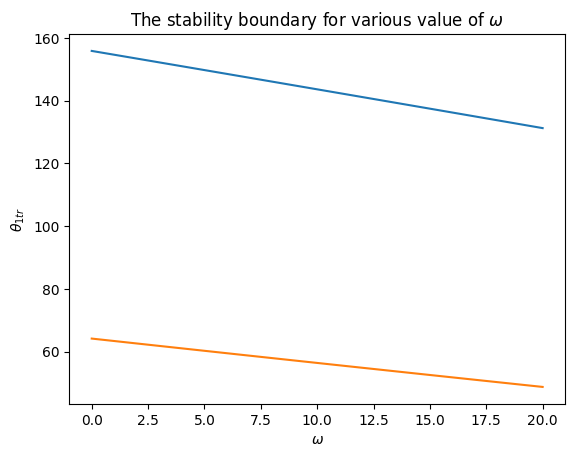

In [29]:
%autoreload
omega = np.linspace(0, 20, 50)
upper_stable = []
lower_stable = []
for r in omega:
    upper_stable.append(sim2.stable_threshold_omega(r, init=120))
    lower_stable.append(sim2.stable_threshold_omega(r, init=70))
plt.plot(omega, upper_stable, label="upper stability threshold")
plt.plot(omega, lower_stable, label="lower stability threshold")
plt.ylabel(r"$\theta_{1tr}$")
plt.xlabel(r"$\omega$")
plt.title(r"The stability boundary for various value of $\omega$")
